In [17]:
import cygno as cy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
runInfo=cy.read_cygno_logbook(sql=True)
image = np.zeros((2304, 2304), dtype=np.int64)
x_var = []
y_var = []
data_to_save = {}
run=43628
force = True
if runInfo[runInfo.run_number==run].source_type.values[0]==0 or force:
    run_name = '/jupyter-workspace/cloud-storage/cygno-analysis/pkl/'+'reco_run{0:05d}_3D.pkl.gz'.format(run)
    dfall=pd.read_pickle(run_name, compression={'method': 'gzip'})
    cut = dfall.sc_integral/dfall.sc_nhits
    for i, Sc in enumerate(dfall.nSc):
        for j, val in enumerate(cut[i]):
            if val>20 and (dfall.sc_nhits[i][j]>1000) or force:
                if j == len(cut[i])-1:
                    jmax = int(len(dfall.redpix_ix[i]))
                else:
                    jmax = int(dfall.sc_redpixIdx[i][j+1])
                #print (dfall.sc_nhits[i][j])
                image[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                      dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
                image[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                      dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
                dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]
                x_var.append(int(dfall.sc_xmean[i][j]))
                y_var.append(int(dfall.sc_ymean[i][j]))
                
data_to_save['image']=[image]
data_to_save['x_var']=[x_var]
data_to_save['y_var']=[y_var]
dftmp = pd.DataFrame(data_to_save, index=[0])

In [21]:
dfall.columns

Index(['run', 'event', 'pedestal_run', 'cmos_integral', 'cmos_mean',
       'cmos_rms', 't_DBSCAN', 't_variables', 'lp_len', 't_pedsub',
       't_saturation', 't_zerosup', 't_xycut', 't_rebin', 't_medianfilter',
       't_noisered', 'nSc', 'sc_size', 'sc_nhits', 'sc_integral',
       'sc_corrintegral', 'sc_rms', 'sc_energy', 'sc_pathlength',
       'sc_redpixIdx', 'nRedpix', 'redpix_ix', 'redpix_iy', 'redpix_iz',
       'sc_theta', 'sc_length', 'sc_width', 'sc_longrms', 'sc_latrms',
       'sc_lfullrms', 'sc_tfullrms', 'sc_lp0amplitude', 'sc_lp0prominence',
       'sc_lp0fwhm', 'sc_lp0mean', 'sc_tp0fwhm', 'sc_xmean', 'sc_ymean',
       'sc_xmax', 'sc_xmin', 'sc_ymax', 'sc_ymin', 'sc_pearson',
       'sc_tgaussamp', 'sc_tgaussmean', 'sc_tgausssigma', 'sc_tchi2',
       'sc_tstatus', 'sc_lgaussamp', 'sc_lgaussmean', 'sc_lgausssigma',
       'sc_lchi2', 'sc_lstatus', 'Lime_pressure', 'Atm_pressure',
       'Lime_temperature', 'Atm_temperature', 'Humidity', 'Mixture_Density'],
      dtype

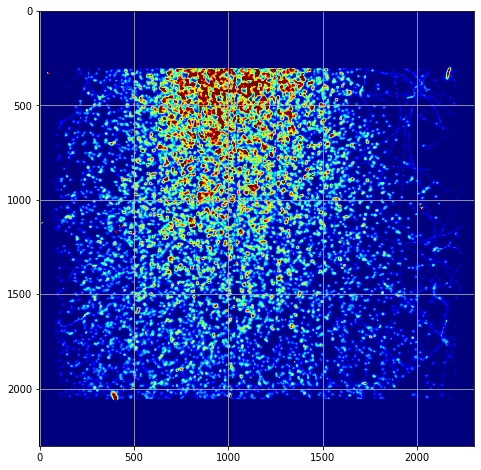

In [2]:
plt.figure(figsize=(8,8))
plt.imshow(image, vmin=0, vmax=100, cmap='jet')
plt.grid(None)
plt.show()

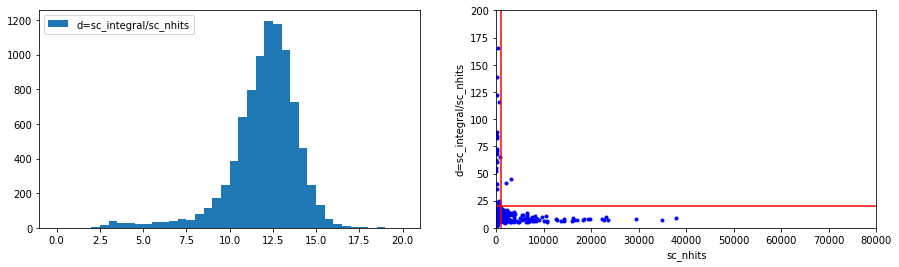

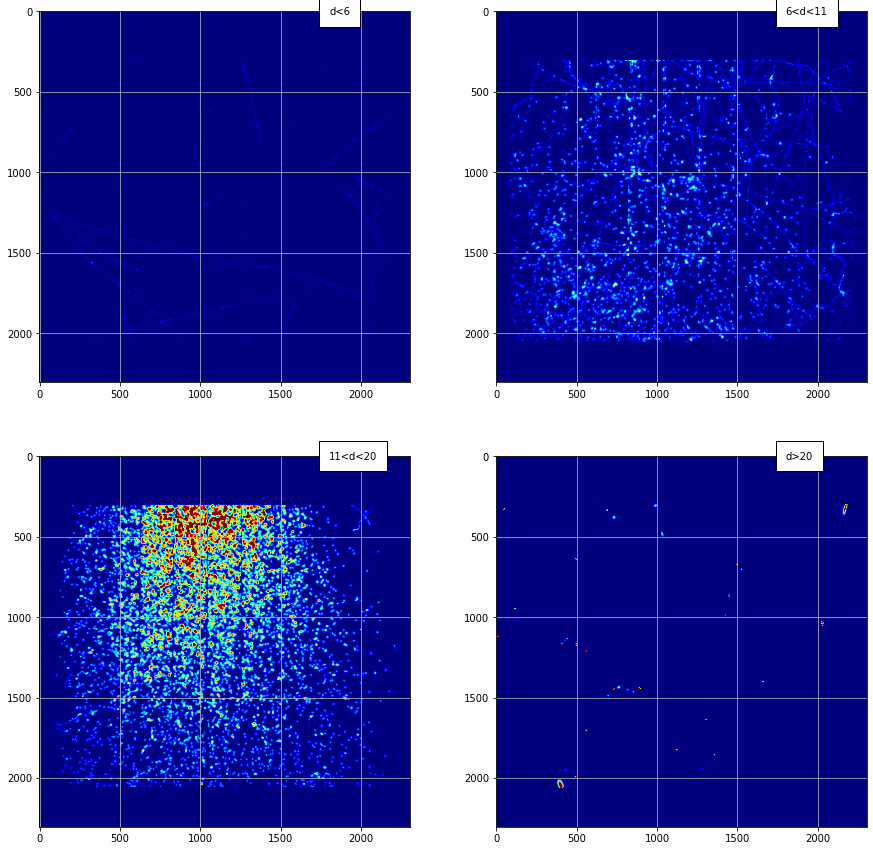

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(np.hstack(dfall.sc_integral/dfall.sc_nhits), bins=40, range=(0, 20), label='d=sc_integral/sc_nhits')
ax[0].legend()
ax[1].plot(np.hstack(dfall.sc_nhits), np.hstack(dfall.sc_integral/dfall.sc_nhits), 'b.')
ax[1].axhline(20, color='r')
ax[1].axvline(1000, color='r')
ax[1].set_ylim(0,200)
ax[1].set_xlim(0,80000)
ax[1].set_xlabel('sc_nhits')
ax[1].set_ylabel('d=sc_integral/sc_nhits')
plt.show()
fig, ax = plt.subplots(2,2, figsize=(15,15))
imageA = np.zeros((2304, 2304), dtype=np.int64)
imageB = np.zeros((2304, 2304), dtype=np.int64)
imageC = np.zeros((2304, 2304), dtype=np.int64)
imageD = np.zeros((2304, 2304), dtype=np.int64)
cut = dfall.sc_integral/dfall.sc_nhits

for i, Sc in enumerate(dfall.nSc):
    for j, val in enumerate(cut[i]):
        if j == len(cut[i])-1:
            jmax = int(len(dfall.redpix_ix[i]))
        else:
            jmax = int(dfall.sc_redpixIdx[i][j+1])
        if val>=20 : #and (dfall.sc_nhits[i][j]>1000)
            if j == len(cut[i])-1:
                jmax = int(len(dfall.redpix_ix[i]))
            else:
                jmax = int(dfall.sc_redpixIdx[i][j+1])
            # print (dfall.sc_nhits[i][j])
            imageD[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageD[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]
        elif val>=11 and val<20:
            imageC[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageC[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]
        elif val>=6 and val<11:
            imageB[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageB[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]   
        elif val<6:
            imageA[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]=\
            imageA[dfall.redpix_ix[i][int(dfall.sc_redpixIdx[i][j]):jmax], 
                  dfall.redpix_iy[i][int(dfall.sc_redpixIdx[i][j]):jmax]]+\
            dfall.redpix_iz[i][int(dfall.sc_redpixIdx[i][j]):jmax]  
ax[0,0].imshow(imageA, vmin=0, vmax=100, cmap='jet', )
ax[0,1].imshow(imageB, vmin=0, vmax=100, cmap='jet', )
ax[1,0].imshow(imageC, vmin=0, vmax=100, cmap='jet', )
ax[1,1].imshow(imageD, vmin=0, vmax=100, cmap='jet', )
ax[0,0].text(1800, 20, 'd<6', bbox={'facecolor': 'white', 'pad': 10})
ax[0,1].text(1800, 20, '6<d<11', bbox={'facecolor': 'white', 'pad': 10})
ax[1,0].text(1800, 20, '11<d<20', bbox={'facecolor': 'white', 'pad': 10})
ax[1,1].text(1800, 20, 'd>20', bbox={'facecolor': 'white', 'pad': 10})
ax[0,0].grid(None)
ax[0,1].grid(None)
ax[1,0].grid(None)
ax[1,1].grid(None)
plt.show()

In [31]:
df = pd.DataFrame({'a': [1], 'b': [1], 'd':[1]})

In [28]:
df

,a,b,d
0,1,2,3


In [32]:
dc = pd.DataFrame({'a': [2], 'b': [2], 'd':[2]})

In [33]:
dt = df+dc

In [34]:
dt

,a,b,d
0,3,3,3


In [22]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
import numpy as np
import matplotlib.pyplot as plt
np.histogram(np.random.rand(10))[0]+np.histogram(np.random.rand(10))[0]

array([3, 2, 2, 2, 0, 6, 1, 0, 0, 4])

In [9]:
a = np.histogram(np.random.rand(10))[0]
b = np.histogram(np.random.rand(10))[0]
print (a, b, a+b)

[3 0 1 0 1 0 1 1 2 1] [2 0 0 1 2 0 2 0 0 3] [5 0 1 1 3 0 3 1 2 4]


In [ ]:
from IPython import display
import time
bins = 100
a = np.histogram(np.random.normal(bins/2, bins/20, bins), bins)[0]
x = np.array([x for x in range(bins)])
for i in range(100):
    a = a +np.histogram(np.random.normal(bins/2, bins/20, bins), bins)[0]
    plt.figure(figsize=(4,4))
    plt.bar(x, a, width=1, label = str(i))
    plt.legend()

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

In [78]:
class myHist(object):
    import numpy as np
    def __init__(self, value, **kwargs):
        self.value  = value
        self.kwargs = kwargs
        self.run = np.histogram(value, **kwargs)[0]
        print(self.run)
        
    def fill(self, value):
        self.run = self.run+np.histogram(value, **self.kwargs)[0]
        return self.run
    
def alpha_rate(cut,length, xmax=40):
#    cut = dfall.sc_integral/dfall.sc_nhits
    nalpha = 0
    for i in range(len(cut)):
#        nalpha +=len(cut[i][(cut[i]>40) & (dfall.sc_length[i]>50)])
        nalpha +=len(cut[i][(cut[i]>40) & (length[i]>50)])
    return nalpha

def start2epoch(sql_Log, run):
    from datetime import datetime
    date = str(sql_Log[sql_Log.run_number==run].start_time.values[0])
    utc_time = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.000000000")
    epoch_time = (utc_time - datetime(1970, 1, 1)).total_seconds()
    return epoch_time
    
def my_anal(start_run, end_run,verbose=False):
    import numpy as np
    import pandas as pd
    import cygno as cy
    import os
    from datetime import datetime
    try:
        runInfo=cy.read_cygno_logbook(sql=True,verbose=verbose)
        if verbose: print(runInfo)
    except Exception as e:
        print('DB ERROR >>> {}'.format(e))
    
    #runSel = runInfo.loc[runInfo.run_description.str.contains('Stability')]
    #runSel = runInfo.loc[runInfo.run_description == 'Standard']
    runSel = runInfo
    envVar = ['nSc','Lime_pressure', 'Atm_pressure', 'Lime_temperature', 'Atm_temperature', 'Humidity', 'Mixture_Density']
    df = pd.DataFrame(columns = ['run','epoch','alpha']+envVar)
    
    for i, run in enumerate(runSel[(runSel.run_number>=start_run) & 
                                   (runSel.run_number<=end_run)].run_number):

        if (runSel[runSel.run_number==run].online_reco_status.values[0]==1 and \
           runSel[runSel.run_number==run].pedestal_run.values[0]==0) and \
            runInfo[runInfo.run_number==run].source_type.values[0]==0:
            try:
                print("analyzing run: ",run, str(runSel[runSel.run_number==run].run_description.values))
                run_name = '/jupyter-workspace/cloud-storage/cygno-analysis/pkl/'+'reco_run{0:05d}_3D.pkl.gz'.format(run)
                dfall=pd.read_pickle(run_name, compression={'method': 'gzip'})
                ## data to save
                alpha = alpha_rate(np.array(dfall["sc_integral"])/np.array(dfall["sc_nhits"]),np.array(dfall["sc_length"]), xmax=40)
                # humidity = (np.hstack(dfall["Humidity"])).mean()
                
                # add env variables
                value = []
                for j, name in enumerate(envVar):
                    value.append((np.hstack(dfall[name])).mean())
                ## save data 
                epoch = start2epoch(runSel, run)
                df.loc[i] = [run, epoch, alpha]+value

            except Exception as e:
                print("ERROR>>> ", e)
    
    print("DONE")
    return df
    
start_run = 40920
end_run   = 10000000
df = my_anal(start_run, end_run,verbose   = False)
df.to_pickle('/jupyter-workspace/shared/mazzitel/df_'+str(start_run)\
             +'_'+str(end_run)+'.pkl')

analyzing run:  40920 ['Standard']
analyzing run:  40921 ['Standard']
analyzing run:  40923 ['Standard']
analyzing run:  40924 ['Standard']
analyzing run:  40925 ['Standard']
analyzing run:  40926 ['Standard']
analyzing run:  40927 ['Standard']
analyzing run:  40928 ['Standard']
analyzing run:  40930 ['Standard']
analyzing run:  40931 ['Standard']
analyzing run:  40932 ['Standard']
analyzing run:  40933 ['Standard']
analyzing run:  40934 ['Standard']
analyzing run:  40935 ['Standard']
analyzing run:  40937 ['Standard']
analyzing run:  40938 ['Standard']
analyzing run:  40939 ['Standard']
analyzing run:  40940 ['Standard']
analyzing run:  40941 ['Standard']
analyzing run:  40942 ['Standard']
analyzing run:  40944 ['Standard']
analyzing run:  40945 ['Standard']
analyzing run:  40946 ['Standard']
analyzing run:  42274 ['Standard']
analyzing run:  42275 ['Standard']
analyzing run:  42276 ['Standard']
analyzing run:  42277 ['Standard']
analyzing run:  42280 ['Standard']
analyzing run:  4228

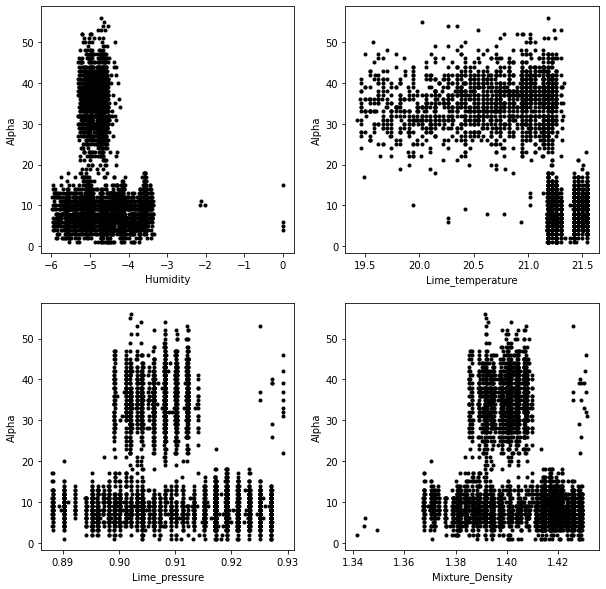

In [79]:
fig, ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(df.Humidity[(df.alpha>0) & (df.Humidity>-6)], df.alpha[(df.alpha>0) & (df.Humidity>-6)], 'k.')
ax[0,0].set_xlabel('Humidity')
ax[0,0].set_ylabel('Alpha')
ax[0,1].plot(df.Lime_temperature[(df.alpha>0) & (df.Lime_temperature>0)], df.alpha[(df.alpha>0) & (df.Lime_temperature>-0)], 'k.')
ax[0,1].set_xlabel('Lime_temperature')
ax[0,1].set_ylabel('Alpha')
ax[1,0].plot(df.Lime_pressure[(df.alpha>0) & (df.Lime_pressure>0)], df.alpha[(df.alpha>0) & (df.Lime_pressure>-0)], 'k.')
ax[1,0].set_xlabel('Lime_pressure')
ax[1,0].set_ylabel('Alpha')
ax[1,1].plot(df.Mixture_Density[(df.alpha>0) & (df.Mixture_Density>0)], df.alpha[(df.alpha>0) & (df.Mixture_Density>-0)], 'k.')
ax[1,1].set_xlabel('Mixture_Density')
ax[1,1].set_ylabel('Alpha')
plt.show()

Text(0, 0.5, 'nSc')

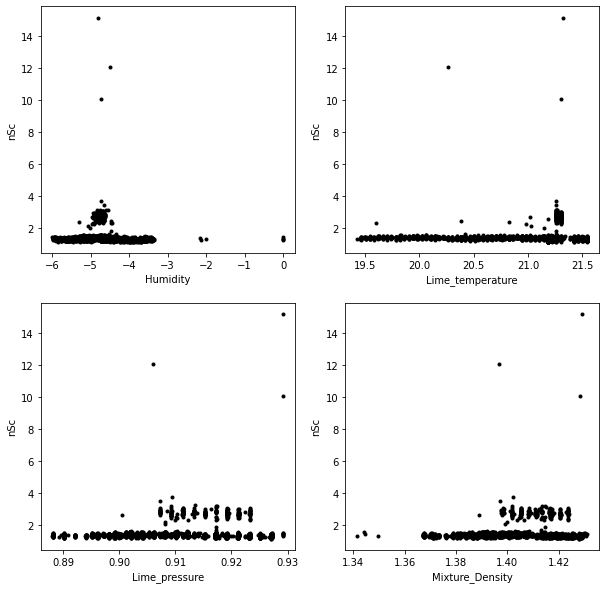

In [83]:
fig, ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(df.Humidity[(df.nSc>0) & (df.Humidity>-6)], df.nSc[(df.nSc>0) & (df.Humidity>-6)], 'k.')
ax[0,0].set_xlabel('Humidity')
ax[0,0].set_ylabel('nSc')
ax[0,1].plot(df.Lime_temperature[(df.nSc>0) & (df.Lime_temperature>0)], df.nSc[(df.nSc>0) & (df.Lime_temperature>-0)], 'k.')
ax[0,1].set_xlabel('Lime_temperature')
ax[0,1].set_ylabel('nSc')
ax[1,0].plot(df.Lime_pressure[(df.nSc>0) & (df.Lime_pressure>0)], df.nSc[(df.nSc>0) & (df.Lime_pressure>-0)], 'k.')
ax[1,0].set_xlabel('Lime_pressure')
ax[1,0].set_ylabel('nSc')
ax[1,1].plot(df.Mixture_Density[(df.nSc>0) & (df.Mixture_Density>0)], df.nSc[(df.nSc>0) & (df.Mixture_Density>-0)], 'k.')
ax[1,1].set_xlabel('Mixture_Density')
ax[1,1].set_ylabel('nSc')

Text(0, 0.5, 'Alpha')

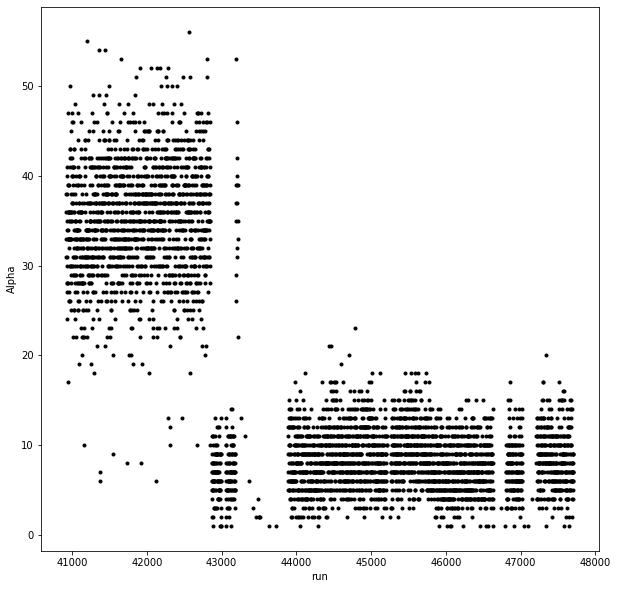

In [86]:
fig, ax=plt.subplots(1,figsize=(10,10))
plt.plot(df.run[(df.alpha>0)], df.alpha[(df.alpha>0)], 'k.')
plt.xlabel('run')
plt.ylabel('Alpha')

In [29]:
arr = np.random.normal(10, 3, 10000)
myhist = myHist(arr, bins=100, range=(-10, +30))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   2   0   1   2   5   6  14  27  17  30  22  50  68  88
 116 132 158 207 259 316 327 367 394 452 477 481 535 531 544 530 498 454
 414 380 384 300 296 240 187 153 127  89  76  58  50  37  33  18  21   9
   8   3   2   2   0   1   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [256]:
arr = np.random.normal(10, 3, 10000)
myhist.fill(arr)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    2,    4,
          7,    3,    7,   17,   22,   31,   49,   75,   91,  111,  171,
        228,  300,  390,  518,  654,  807,  993, 1176, 1462, 1626, 1869,
       2032, 2241, 2337, 2510, 2669, 2669, 2653, 2627, 2471, 2405, 2133,
       2029, 1880, 1631, 1383, 1134, 1033,  849,  632,  515,  405,  295,
        234,  195,  135,  105,   58,   48,   27,   19,   11,   10,    3,
          3,    2,    1,    1,    2,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

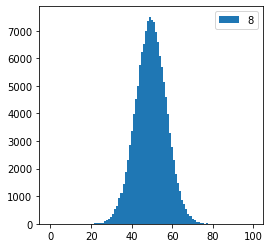

KeyboardInterrupt: 

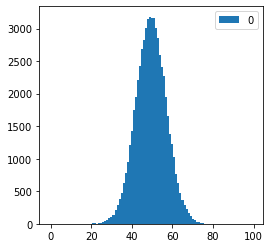

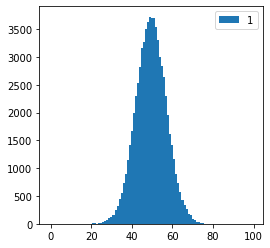

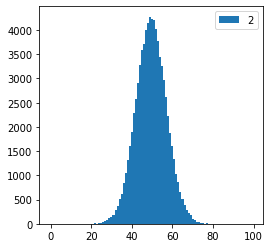

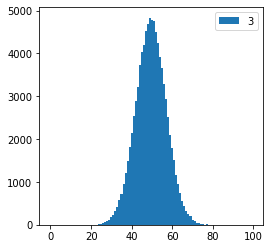

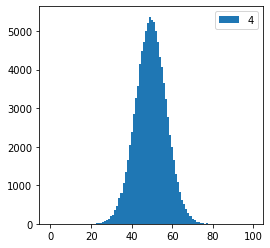

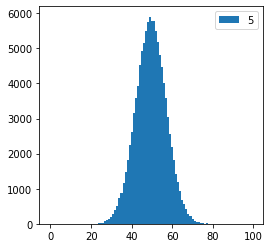

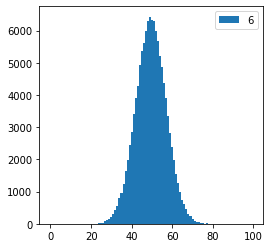

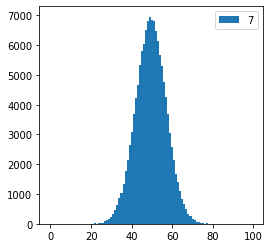

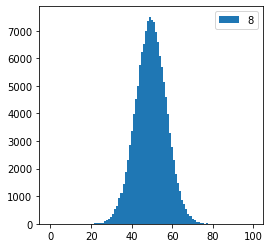

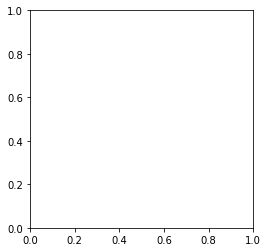

In [257]:
from IPython import display
import time
bins = 100
a = np.histogram(np.random.normal(bins/2, bins/20, bins), bins)[0]
gh = myHist(np.random.normal(10, 3, 10000), bins=100, range=(-10, +30))
x = np.array([x for x in range(bins)])
for i in range(100):
    a = myhist.fill(np.random.normal(10, 3, 10000))
    plt.figure(figsize=(4,4))
    plt.bar(x, a, width=1, label = str(i))
    plt.legend()

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

In [59]:
np.random.normal(bins/2, bins/20, bins)

array([55.6639423 , 55.67825018, 59.39964251, 45.63864664, 44.48498823,
       55.10188543, 49.98894232, 41.55382589, 52.2734024 , 54.63046943,
       48.60831955, 47.70028717, 53.94892841, 46.27493374, 52.86591293,
       45.50723506, 56.23017831, 61.31555364, 46.89668596, 55.25478333,
       44.66587491, 47.00505295, 44.59760876, 50.84746403, 47.36924293,
       66.25882066, 46.06623113, 53.27508812, 45.45958192, 43.70265283,
       55.04104655, 35.8307843 , 44.44586991, 46.55754631, 57.99111565,
       49.03130539, 44.08925965, 54.22058333, 50.08968284, 40.60980014,
       47.81488439, 48.3119097 , 44.29532708, 43.14253867, 49.05966263,
       45.48094658, 43.54606709, 45.64258331, 47.96223645, 52.59303184,
       49.4946595 , 50.42929773, 47.84295297, 55.36503587, 52.19759727,
       56.88726694, 50.53935258, 54.92800177, 52.01728965, 49.18642688,
       50.59511493, 54.45315013, 50.82955587, 42.24474178, 43.14492528,
       48.98342519, 43.40733892, 52.95627582, 45.88473197, 57.60

In [62]:
np.histogram(np.random.normal(bins/2, bins/20, bins), bins, range=(,))[0]

SyntaxError: invalid syntax (<ipython-input-62-f6995121c5c8>, line 1)

In [96]:
np.size([10])

1

In [265]:
def method(**kwargs):
    print(kwargs)
    if "bins" in kwargs:
        print ("ciao")
        
    return np.histogram([1,3,5], **kwargs)
     

In [267]:
method(bins=1000,range=(1,4))

{'bins': 1000, 'range': (1, 4)}
ciao


(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [251]:
np.histogram(1)

(array([ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]))

In [5]:
data_2_store = {}
data_2_store['A']=1
data_2_store['B']=2
df1=pd.DataFrame(data_2_store, index=[0])
data_2_store = {}
data_2_store['A']=3
data_2_store['B']=4
df2=pd.DataFrame(data_2_store, index=[0])
df3 = pd.concat([df1, df2], keys=['df1', 'df2'])

In [6]:
df3

,,A,B
df1,0,1,2
df2,0,3,4


In [10]:
import pandas as pd

# Initialize an empty DataFrame
df = pd.DataFrame()

for i in range(10):
    data_2_store = {}
    data_2_store['A'] = i
    data_2_store['B'] = i*10
    dft = pd.DataFrame(data_2_store, index=[0])
    
    if i > 1:
        dft.index = pd.MultiIndex.from_product([['df', 'dft'], [0]])
        df = pd.concat([df, dft])
    else:
        df = dft

# Display the concatenated DataFrame
print(df)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements